In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid 

import cv2 
from glob import glob

from tensorflow.keras import backend as K 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from PIL.Image import open

from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda
from tensorflow.keras.layers import Conv2DTranspose, MaxPooling2D, concatenate, AveragePooling2D, Dense, Flatten

import seaborn as sns
from  matplotlib import pyplot as plt
import random
%matplotlib inline

In [ ]:

IMAGE_DATASET = r"Dataset\Brain Tumor\Brain Tumor"
IMAGE_DATASET_RAW = r"Dataset\Brain Tumor\Brain Tumor"
WORKING_FOLDER = "."
IMG_WIDTH = 224
EPOCHS = 50
cortex_df = pd.read_csv(r"Dataset\Brain Tumor.csv")

In [15]:
cortex_df.shape

(3762, 15)

In [ ]:
if 'Class' in df_num.columns and not pd.api.types.is_numeric_dtype(df_num['Class']):
    df_num['Class'] = pd.factorize(df_num['Class'])[0]

corr_df = df_num.select_dtypes(include=[np.number]).corr(numeric_only=True)

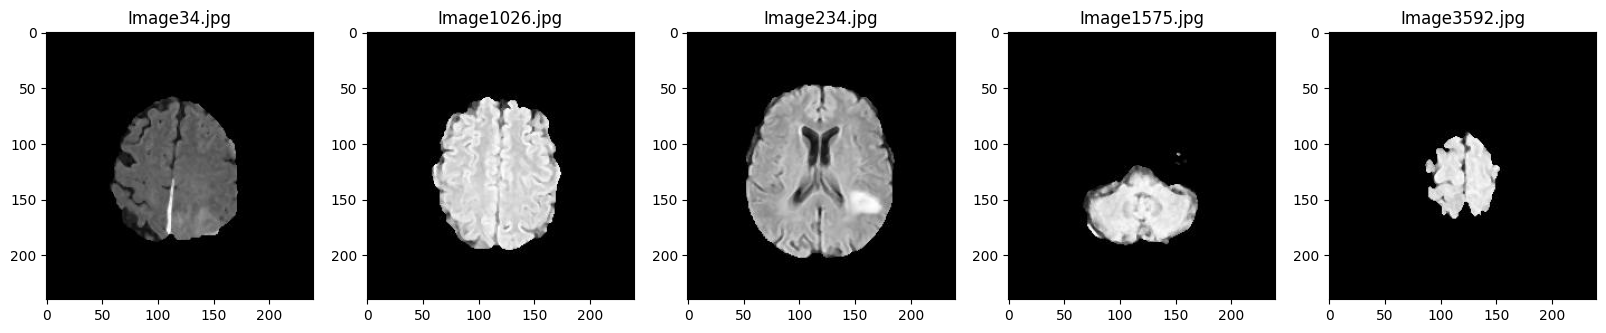

In [ ]:
plt.figure(figsize=(20,20))
test_folder="../input/brain-tumor/Brain Tumor/Brain Tumor" 
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [ ]:
image_list = []
for i in range(len(dataset_df)):
    brain_image = dataset_df["pixels"][i].astype(np.float32)
    brain_image /= 255
    image_list.append(brain_image)
X = np.array(image_list)

(3762, 224, 224, 3)


In [ ]:
print('The shape of the X_train :'+' '+str(X_train.shape))
print('The size of the X_train :'+' '+str(X_train.shape[0]))
print('The size of the X_test:'+' '+str(X_test.shape[0]))

The shape of the X_train : (3009, 224, 224, 3)
The size of the X_train : 3009
The shape of the X_test : (753, 224, 224, 3)
The size of the X_test: 753


In [ ]:
def model(input_shape):
#     res_conv = ResNet50(include_top=False, weights="imagenet", input_tensor=None, input_shape=input_shape, pooling=None)
    model = Sequential()
    

    model.add(Conv2D(16, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"))

    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last", padding='same'))
            
    model.add(Conv2D(32, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"))
    model.add(Conv2D(32, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last", padding='same'))
    model.add(Conv2D(64, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"))
    model.add(Conv2D(64, kernel_size=3, strides=(2, 2), padding="same", activation="relu", kernel_initializer="he_normal"))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last", padding='same'))
    
    model.add(Flatten())
    model.add(Dense(256, activation="relu"))
    model.add(Dense(128, activation="relu"))

#   model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))   
    
    return model

In [32]:
model = model(input_shape = (IMG_HEIGHT, IMG_WIDTH, 3))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 112, 112, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 56, 56, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 1, 1, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,745 (475.57 KB)

 Trainable params: 121,745 (475.57 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name="Adam",)
optimizer = SGD(learning_rate=0.01)
loss_fn = BinaryCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])  # f1 score

In [34]:
history = model.fit(x=X_train, y=y_train, epochs=EPOCHS, batch_size=10)

Epoch 1/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6962 - loss: 0.5904
Epoch 2/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6962 - loss: 0.5904
Epoch 2/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7793 - loss: 0.4894
Epoch 3/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7793 - loss: 0.4894
Epoch 3/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7953 - loss: 0.4605
Epoch 4/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7953 - loss: 0.4605
Epoch 4/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8166 - loss: 0.4241
Epoch 5/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8166 - loss: 0.4241
Epoch 5/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8352 - loss: 0.3797
Epoch 6/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8352 - loss: 0.3797
Epoch 6/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8571 - loss: 0.3353
Epoch 7/50
301/301 ━━━━━━━━━━━━━━━━━━━━ 6s 

In [35]:
eval_score = model.evaluate(X_test, y_test)
print("Test loss:", eval_score[0])
print("Test accuracy:", eval_score[1])

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9748 - loss: 0.1832
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9748 - loss: 0.1832
Test loss: 0.183161661028862
Test accuracy: 0.9747676253318787
Test loss: 0.183161661028862
Test accuracy: 0.9747676253318787


In [36]:
print("The maximum accuracy obtained = {0:.2f}".format(eval_score[1]*100),"%")

The maximum accuracy obtained = 97.48 %


In [37]:
model.save('brain_tumor_cnn_model.h5')
print("CNN model saved as 'brain_tumor_cnn_model.h5'")

CNN model saved as 'brain_tumor_cnn_model.h5'


Text(0.5, 1.0, 'Training Accuracy')

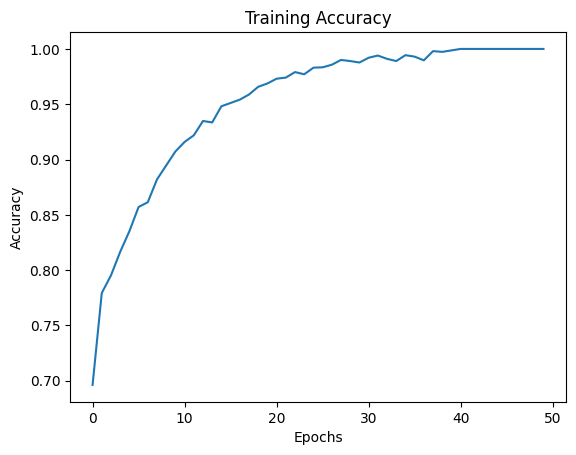

In [38]:
epoch = np.arange(len(history.history['accuracy']))
plt.plot(epoch, history.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')